## Ayudantía 5

### Profesor: Luis Cossio
### Ayudante: Gabriel Díaz

# Árboles de Decisión – Clasificador al Detalle

## ¿Qué es un Árbol de Decisión?

Un árbol de decisión es un **modelo de clasificación (o regresión)** que toma decisiones **en forma de árbol**, donde cada nodo representa una pregunta o condición sobre un atributo, y cada rama una posible respuesta.

El árbol divide progresivamente el espacio de los datos en regiones más homogéneas respecto a la variable objetivo.

---

## ¿Cómo funciona?

1. El algoritmo parte del conjunto completo de entrenamiento.
2. Busca el atributo que **mejor separa** las clases (según un criterio como **ganancia de información** o **impureza de Gini**).
3. Divide el conjunto de datos en subgrupos según los valores del atributo seleccionado.
4. Repite el proceso recursivamente en cada subgrupo.
5. Termina cuando:
   - Todos los elementos son de la misma clase, o
   - Se alcanza una **profundidad máxima**, o
   - El subgrupo es muy pequeño.

---

## Criterios comunes para dividir nodos

### 1. Entropía

$$H(D) = - \sum_{i=1}^{k} p_i \log_2(p_i)$$

Mide la incertidumbre o desorden del conjunto.

---

### 2. Ganancia de Información

$$Gain(A) = H(D) - \sum_{v \in valores(A)} \frac{|D_v|}{|D|} H(D_v)$$

Cuantifica cuánto disminuye la entropía al dividir por el atributo A.

---

### 3. Impureza de Gini

$$Gini(D) = 1 - \sum_{i=1}^{k} p_i^2$$

Menor valor de Gini = mayor pureza. Es más rápido de calcular que la entropía.

---

## Ventajas

- Fácil de interpretar y visualizar 
- No necesita escalar los datos
- Acepta atributos numéricos y categóricos
- Puede capturar relaciones no lineales

---

## Desventajas

- Alto riesgo de **overfitting** si no se poda
- Sensible a pequeñas variaciones en los datos
- Árboles muy profundos pueden ser difíciles de interpretar

---

## Aplicaciones típicas

- Diagnóstico médico  
- Clasificación de clientes o productos   
- Predicción de resultados según reglas lógicas 

---





Matriz de Confusión:
[[7908  188]
 [ 372 7714]]

 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8096
           1       0.98      0.95      0.96      8086

    accuracy                           0.97     16182
   macro avg       0.97      0.97      0.97     16182
weighted avg       0.97      0.97      0.97     16182



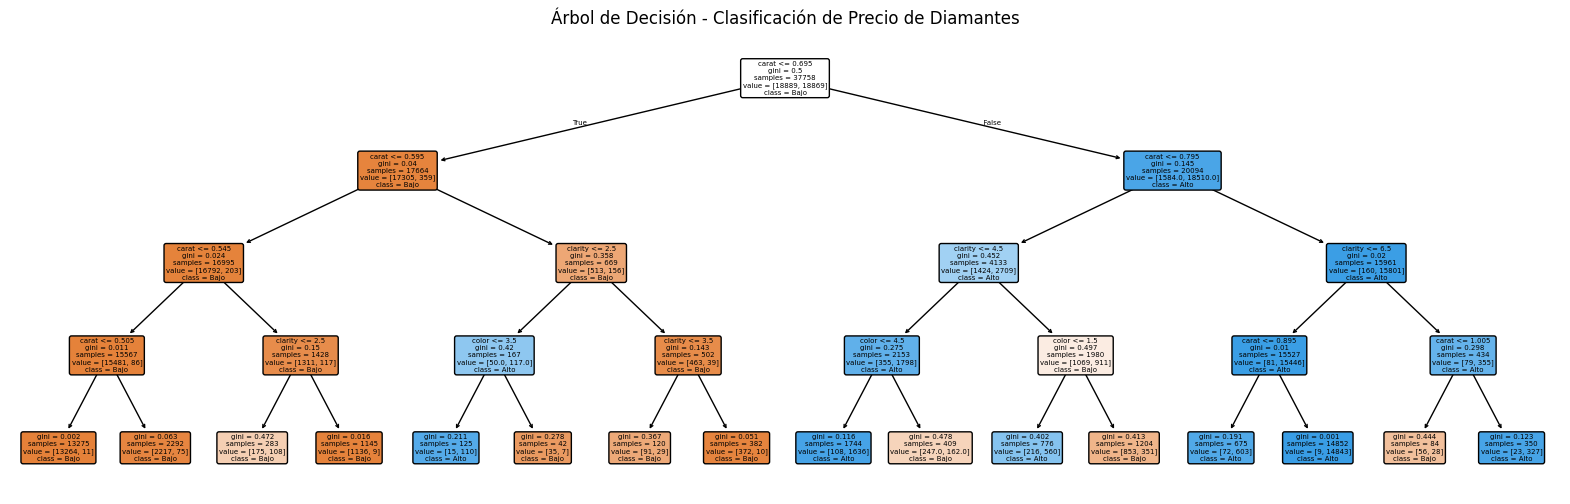

In [2]:
# Importar librerías necesarias
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Cargar el dataset
df = sns.load_dataset("diamonds")  

# 2. Seleccionar variables relevantes
df = df[['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'price']].dropna()

# 3. Codificar variables categóricas
df['cut'] = df['cut'].astype('category').cat.codes
df['color'] = df['color'].astype('category').cat.codes
df['clarity'] = df['clarity'].astype('category').cat.codes

# 4. Crear variable objetivo binaria (alto o bajo precio)
df['high_price'] = (df['price'] > df['price'].median()).astype(int)

# 5. Separar características y variable objetivo
X = df.drop(columns=['price', 'high_price'])
y = df['high_price']

# 6. Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 7. Crear y entrenar el modelo
arbol = DecisionTreeClassifier(max_depth=4, random_state=42)
arbol.fit(X_train, y_train)

# 8. Realizar predicciones
y_pred = arbol.predict(X_val)

# 9. Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_val, y_pred))

print("\n Reporte de Clasificación:")
print(classification_report(y_val, y_pred))

# 10. Visualizar el árbol
plt.figure(figsize=(20, 6))
plot_tree(arbol, feature_names=X.columns, class_names=["Bajo", "Alto"], filled=True, rounded=True)
plt.title("Árbol de Decisión - Clasificación de Precio de Diamantes")
plt.show()


# ¿Cómo interpretar un Árbol de Decisión?

Cuando visualizas un árbol con `plot_tree()`, cada **nodo** del gráfico contiene la siguiente información:

- carat <= 0.695
- gini = 0.5
- samples = 37758
- value = [18889, 18869]
- class = Bajo

### ¿Qué significa?

1. **`carat <= 0.695`**:
   - Es la **condición de división**.
   - Los diamantes con carat menor o igual a 0.695 **van a la izquierda**.
   - Los diamantes con carat mayor a 0.695 **van a la derecha**.

2. **`gini = 0.5`**:
   - Es la **impureza de Gini** del nodo.
   - 0.5 significa máxima mezcla entre clases (mala separación).
   - Mientras más cercano a 0, más puro es el nodo.

3. **`samples = 37758`**:
   - Total de ejemplos (diamantes) que llegaron a ese nodo.

4. **`value = [18889, 18869]`**:
   - Distribución de clases:
     - 18889 diamantes son de clase 0 (bajo precio)
     - 18869 diamantes son de clase 1 (alto precio)

5. **`class = Bajo`**:
   - Es la **clase predicha** en este nodo (la más frecuente).

---

## ¿Cómo seguir el árbol?

- Desde la raíz, **sigues las ramas** de izquierda a derecha:
  - Si la condición se cumple (`<=`), vas a la izquierda.
  - Si no se cumple, vas a la derecha.

- Cada nuevo nodo **vuelve a preguntar sobre otra variable**, dividiendo el subconjunto anterior.
- Este proceso continúa hasta llegar a una **hoja**, donde ya no se divide más.

---

## Ejemplo de lectura completa:

1. Nodo raíz: `carat <= 0.695`
   - Si **sí**, ve a la izquierda.
2. Nodo siguiente: `cut <= 1.5`
   - Si **sí**, ve a la izquierda.
3. Nodo siguiente: ...
   - Así sucesivamente, hasta llegar a un nodo hoja con una predicción establecida.

---

## Observaciones útiles para los alumnos

- El árbol busca **atributos que separen bien las clases**.
- Atributos como `carat`, `cut`, `clarity` o `color` aparecerán cerca de la raíz si son muy relevantes.
- Puedes **entender cómo el modelo toma decisiones** y **explicarlo en lenguaje natural**.

---

## ¿Cómo usar esto?

- Para explicar por qué un diamante se predice como “caro” o “barato”.
- Para tomar decisiones basadas en reglas (“si carat es alto y clarity buena → alto precio”).
- Para auditar o interpretar el modelo en contextos reales.

---

# Comparación de Clasificadores

In [3]:
import numpy as np
import pandas as pd
import scipy.spatial.distance as dist 
import matplotlib.pyplot as plt

np.random.seed(333)

# Exploración
En esta parte analizaremos los datos del archivo coordinates1.txt. Este archivo es un archivo de texto de 3 columnas. Las primeras dos representan localizaciones de objetos en un plano 2D para sus coordenadas $x_1$ y $x_2$. La tercera columna representa la categoría donde cae cada muestra. 
# P1
1. Analizar los datos del datastet 1 y graficarlos. 

In [4]:
dataset1 = np.loadtxt('coordinates1.txt',delimiter=',')
dataset1.shape

(500, 3)

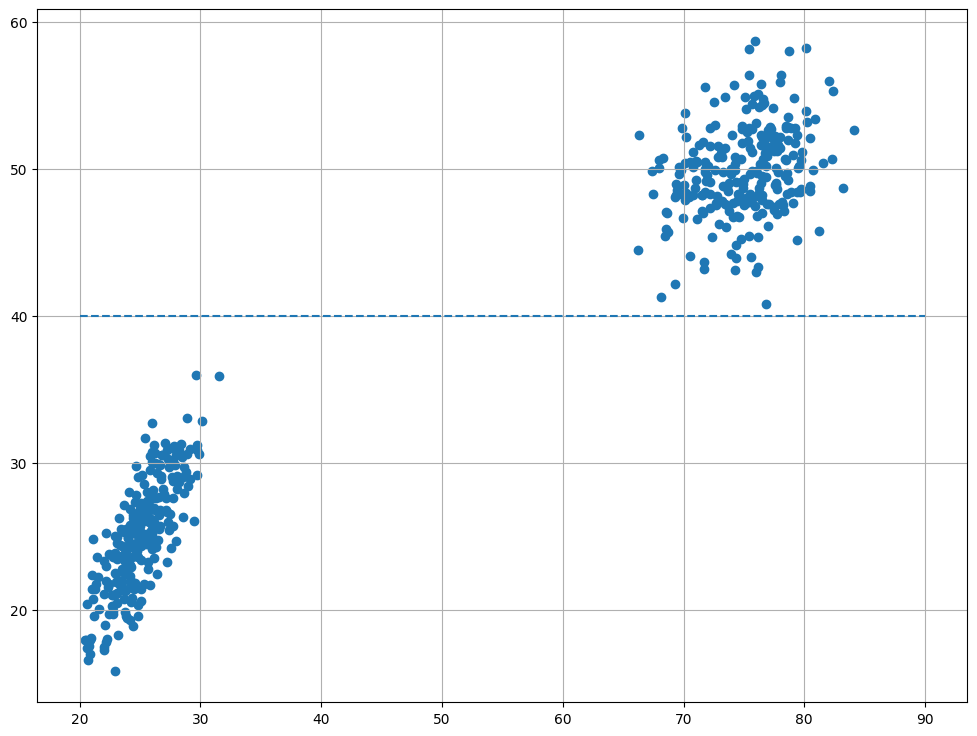

In [5]:
plt.figure(figsize=(12,9))
plt.scatter(dataset1[:,0],dataset1[:,1])
plt.plot([20,90],[40,40],'--')
plt.grid()

In [6]:
red = dataset1[dataset1[:,2]==0,0:2] # SELECCIONAR SOLO LAS COLUMNAS DE DATOS NO DE CLASES
blue = dataset1[dataset1[:,2]==1,0:2]
print(red.shape)
print(blue.shape)

(250, 2)
(250, 2)


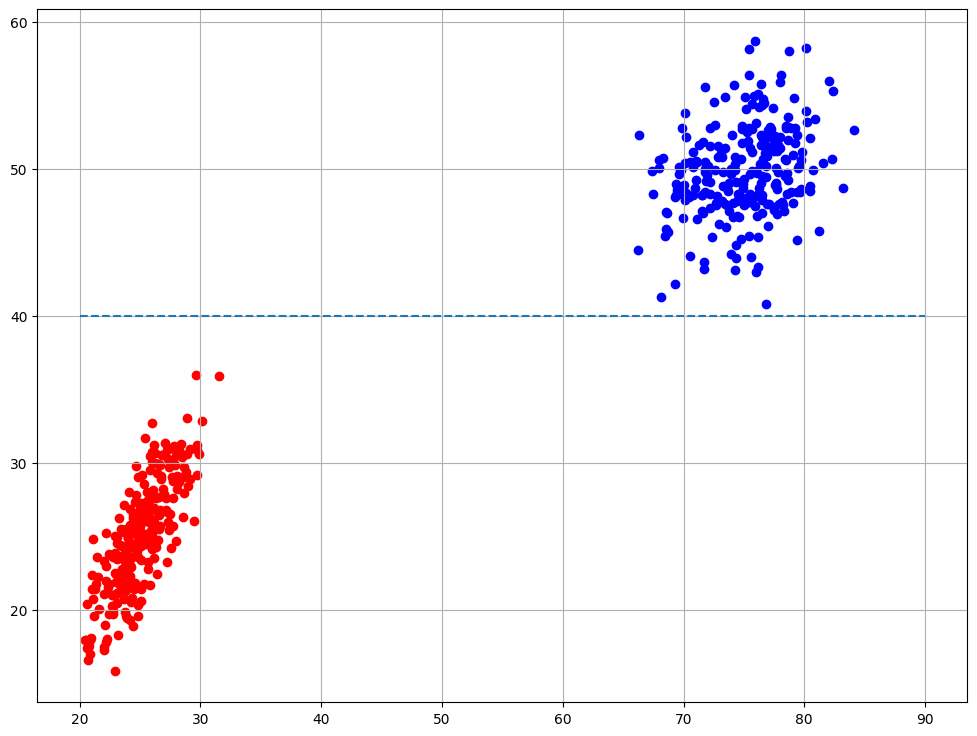

In [7]:
plt.figure(figsize=(12,9))
plt.scatter(red[:,0],red[:,1],color='r')
plt.scatter(blue[:,0],blue[:,1],color='b')
plt.plot([20,90],[40,40],'--')
plt.grid()

### Agregar puntos 

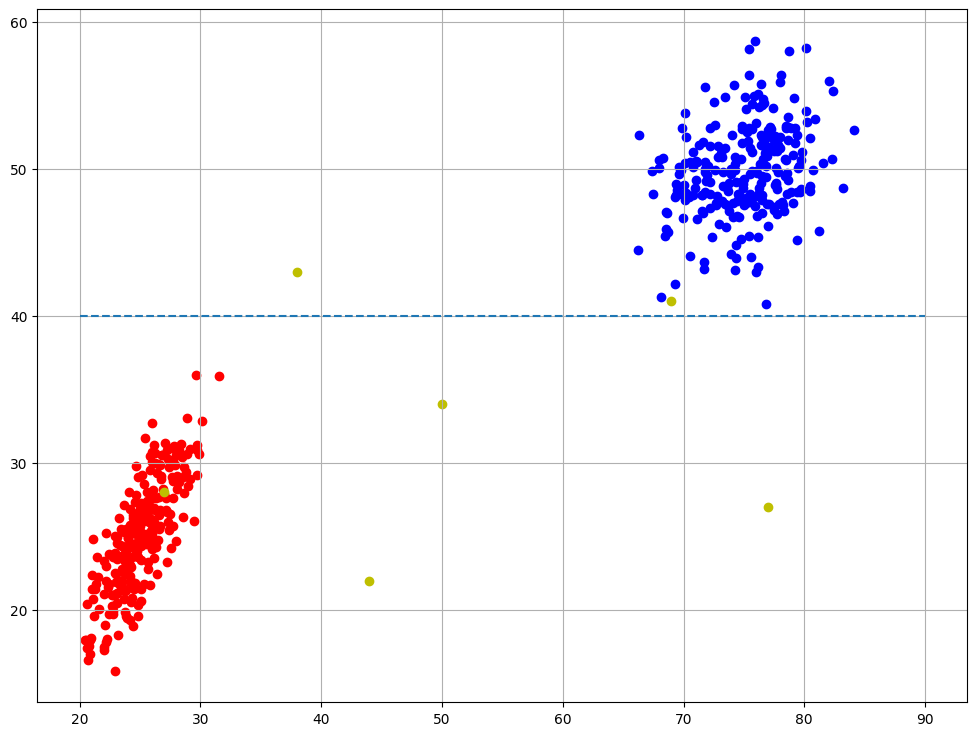

In [8]:
muestra_aleatoria = np.random.randint([15,15],[90,60],[6,2])

plt.figure(figsize=(12,9))
plt.scatter(red[:,0],red[:,1],color='r')
plt.scatter(blue[:,0],blue[:,1],color='b')
plt.scatter(muestra_aleatoria[:,0],muestra_aleatoria[:,1],color='y')
plt.plot([20,90],[40,40],'--')
plt.grid()

### Método por altura

In [9]:
def classifier1_2D(sample):
    if sample[1] > 40:
        return 1.0
    else:
        return 0.0
    
def classify_samples(samples):
    red_samples = []
    blue_samples = []
    for sample in samples:
        if classifier1_2D(sample) == 0:
            red_samples += [sample]
        else:
            blue_samples += [sample]
    
    print("Total samples: ",len(samples))
    print("N samples red: ",len(red_samples))
    print("N samples blue: ",len(blue_samples))
    red_samples = np.array(red_samples)
    blue_samples = np.array(blue_samples)
    return red_samples,blue_samples
    
new_red,new_blue = classify_samples(muestra_aleatoria)

Total samples:  6
N samples red:  4
N samples blue:  2


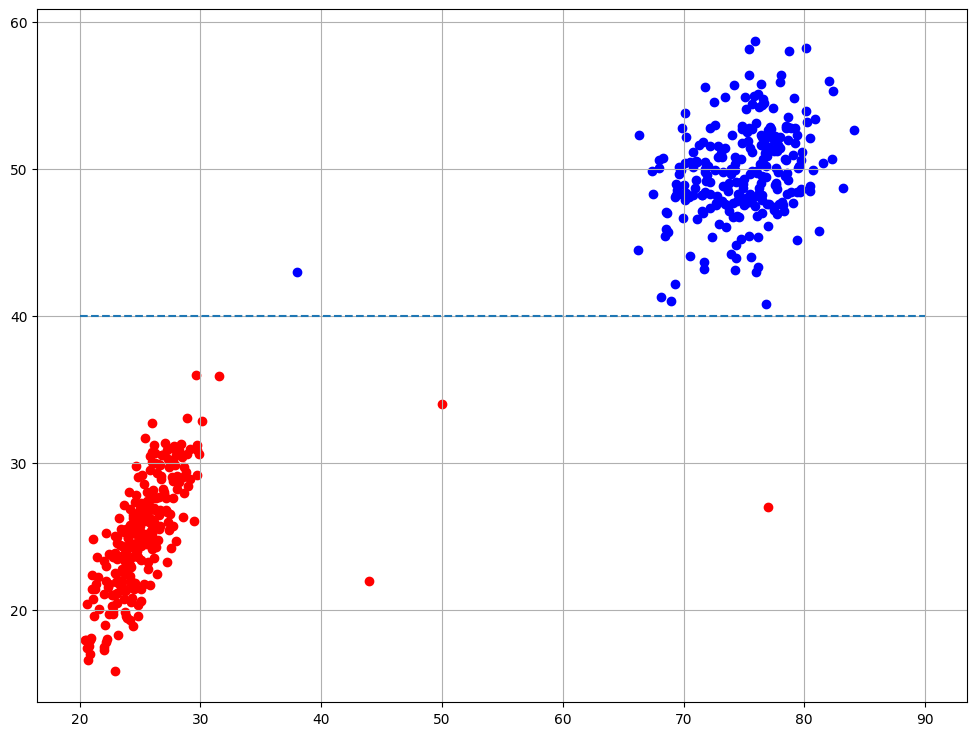

In [10]:
plt.figure(figsize=(12,9))
plt.scatter(red[:,0],red[:,1],color='r')
plt.scatter(blue[:,0],blue[:,1],color='b')
plt.scatter(new_red[:,0],new_red[:,1],color='r')
plt.scatter(new_blue[:,0],new_blue[:,1],color='b')
plt.plot([20,90],[40,40],'--')
plt.grid()

### Método 2, función afin.

-0.8
81.0


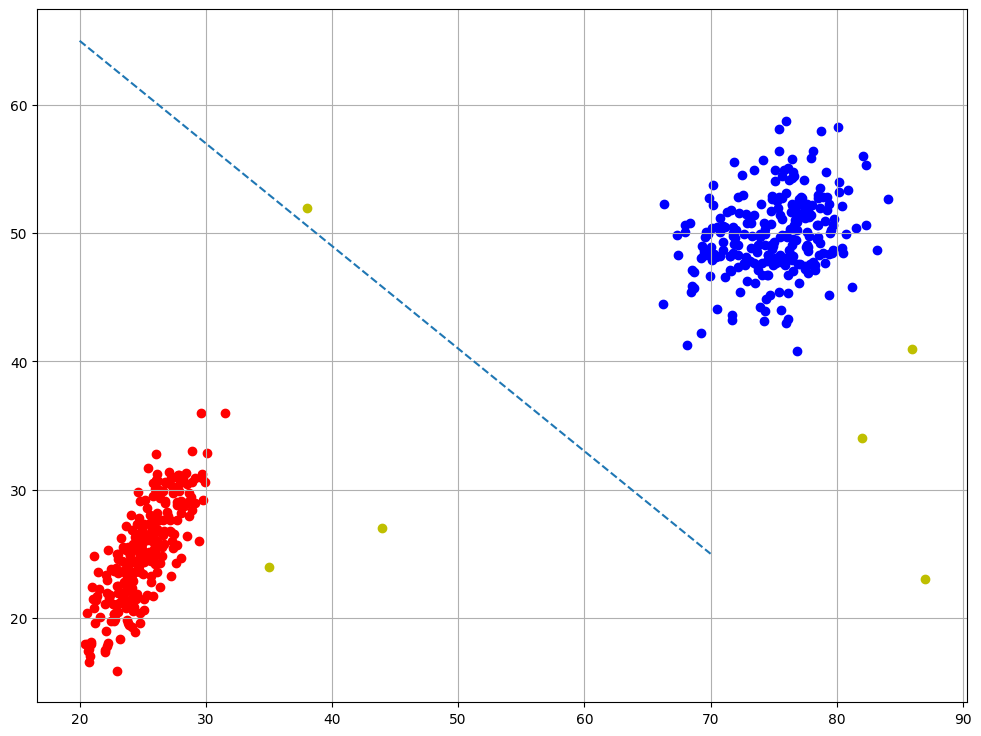

In [11]:
muestra_aleatoria = np.random.randint([15,15],[90,60],[6,2])

plt.figure(figsize=(12,9))
plt.scatter(red[:,0],red[:,1],color='r')
plt.scatter(blue[:,0],blue[:,1],color='b')
plt.scatter(muestra_aleatoria[:,0],muestra_aleatoria[:,1],color='y')

posx,posy = [20,70],[65,25]
plt.plot(posx,posy,'--')
plt.grid()
m = (posy[0]-posy[1])/(posx[0]-posx[1])
c = posy[0] - posx[0] * m 
print(m)
print(c)

In [12]:
def classifier2_2D(sample):
    if sample[0] * (-0.8) + 81 > sample[1]:
        return 0.0
    else:
        return 1.0
    
def classify_samples(samples):
    red_samples = []
    blue_samples = []
    for sample in samples:
        if classifier2_2D(sample) == 0:
            red_samples += [sample]
        else:
            blue_samples += [sample]
    
    print("Total samples: ",len(samples))
    print("N samples red: ",len(red_samples))
    print("N samples blue: ",len(blue_samples))
    red_samples = np.array(red_samples)
    blue_samples = np.array(blue_samples)
    return red_samples,blue_samples
    
new_red,new_blue = classify_samples(muestra_aleatoria)

Total samples:  6
N samples red:  2
N samples blue:  4


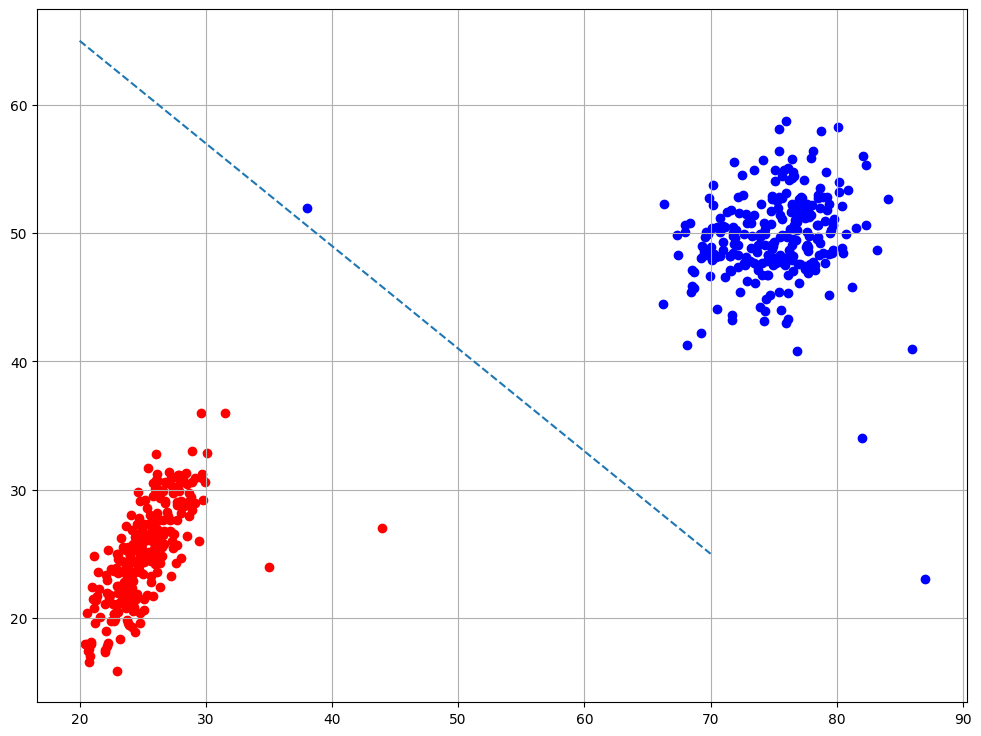

In [13]:
plt.figure(figsize=(12,9))
plt.scatter(red[:,0],red[:,1],color='r')
plt.scatter(blue[:,0],blue[:,1],color='b')
plt.scatter(new_red[:,0],new_red[:,1],color='r')
plt.scatter(new_blue[:,0],new_blue[:,1],color='b')
plt.plot(posx,posy,'--')
# plt.plot([20,70],[55,15],'--')
plt.grid()

### Clasificador KNN

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("Resultados del KNN:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Resultados del KNN:
[[7743  352]
 [ 369 7718]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8095
           1       0.96      0.95      0.96      8087

    accuracy                           0.96     16182
   macro avg       0.96      0.96      0.96     16182
weighted avg       0.96      0.96      0.96     16182



In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("Resultados de la Regresión Logística:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Resultados de la Regresión Logística:
[[7892  203]
 [ 214 7873]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8095
           1       0.97      0.97      0.97      8087

    accuracy                           0.97     16182
   macro avg       0.97      0.97      0.97     16182
weighted avg       0.97      0.97      0.97     16182



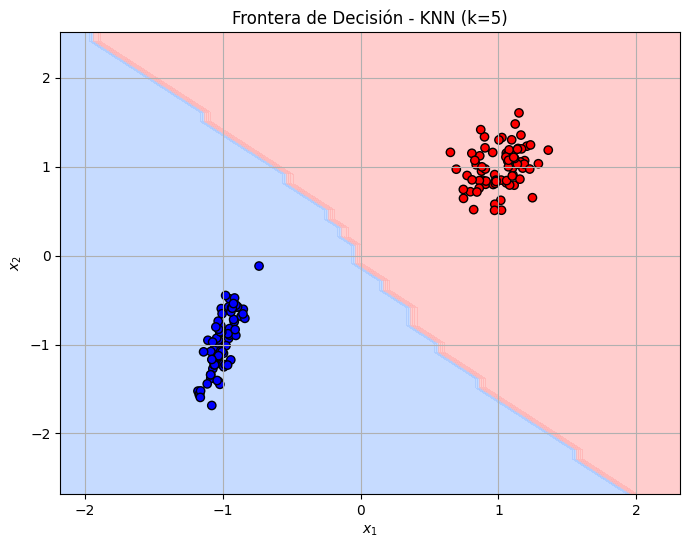

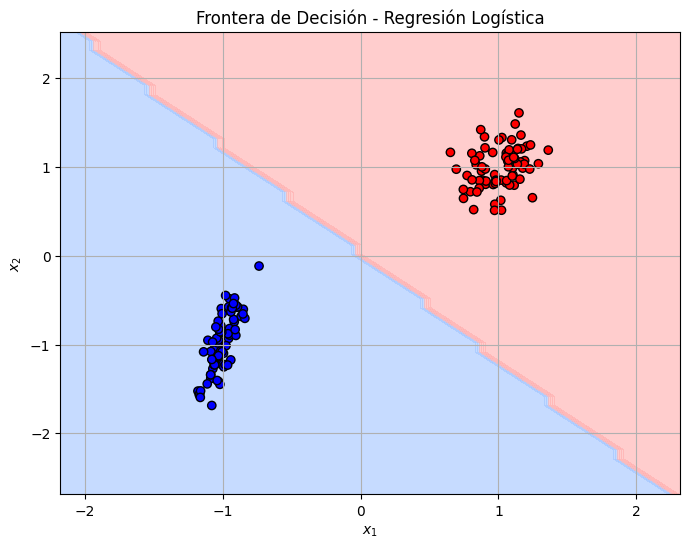

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Separar coordenadas y etiquetas
X = dataset1[:, :2]
y = dataset1[:, 2]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Entrenar Regresión Logística
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Función para graficar la frontera de decisión
def graficar_frontera(modelo, X_scaled, y_true, title):
    h = 0.1  # resolución del mallado
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Crear gráfico
    plt.figure(figsize=(8, 6))
    cmap_fondo = ListedColormap(['#A0C4FF', '#FFADAD'])
    cmap_puntos = ListedColormap(['blue', 'red'])

    plt.contourf(xx, yy, Z, cmap=cmap_fondo, alpha=0.6)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, cmap=cmap_puntos, edgecolor='k')
    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid(True)
    plt.show()

# Mostrar las fronteras de ambos modelos
graficar_frontera(knn, X_test_scaled, y_test, "Frontera de Decisión - KNN (k=5)")
graficar_frontera(log_reg, X_test_scaled, y_test, "Frontera de Decisión - Regresión Logística")


<Figure size 1000x600 with 0 Axes>

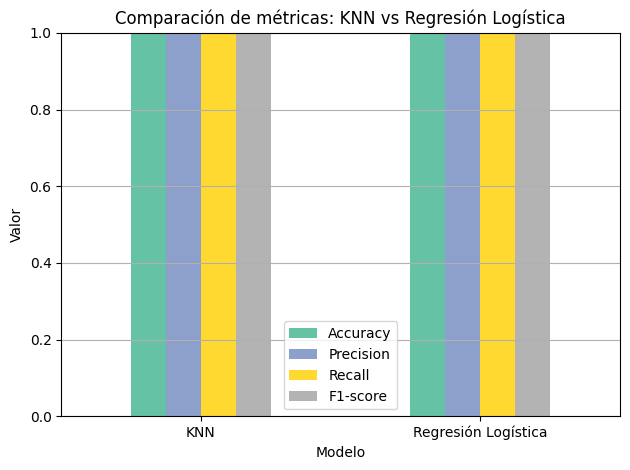

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

knn_metrics = {
    "Modelo": "KNN",
    "Accuracy": accuracy_score(y_test, knn.predict(X_test_scaled)),
    "Precision": precision_score(y_test, knn.predict(X_test_scaled)),
    "Recall": recall_score(y_test, knn.predict(X_test_scaled)),
    "F1-score": f1_score(y_test, knn.predict(X_test_scaled))
}

log_metrics = {
    "Modelo": "Regresión Logística",
    "Accuracy": accuracy_score(y_test, log_reg.predict(X_test_scaled)),
    "Precision": precision_score(y_test, log_reg.predict(X_test_scaled)),
    "Recall": recall_score(y_test, log_reg.predict(X_test_scaled)),
    "F1-score": f1_score(y_test, log_reg.predict(X_test_scaled))
}

# Crear DataFrame de comparación
df_metrics = pd.DataFrame([knn_metrics, log_metrics]).set_index("Modelo")

# Visualización
plt.figure(figsize=(10, 6))
df_metrics.plot(kind='bar', rot=0, ylim=(0, 1), colormap="Set2")
plt.title("Comparación de métricas: KNN vs Regresión Logística")
plt.ylabel("Valor")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


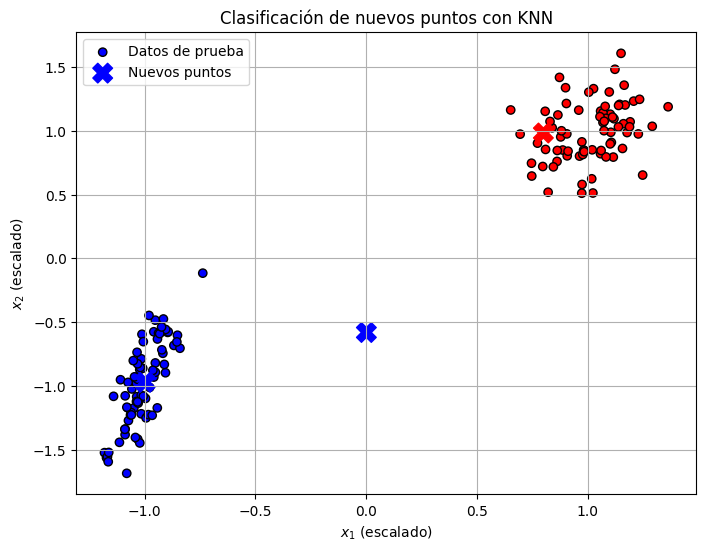

In [18]:
# Nuevos datos a clasificar (en escala original)
nuevos_puntos = np.array([
    [25, 25],
    [70, 50],
    [50, 30]  # punto intermedio
])

# Escalar los nuevos puntos con el mismo scaler usado en entrenamiento
nuevos_puntos_scaled = scaler.transform(nuevos_puntos)

# Clasificación con KNN
predicciones_nuevas = knn.predict(nuevos_puntos_scaled)

# Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=ListedColormap(['blue', 'red']), label='Datos de prueba', edgecolor='k')
plt.scatter(nuevos_puntos_scaled[:, 0], nuevos_puntos_scaled[:, 1], c=predicciones_nuevas, marker='X', s=200, cmap=ListedColormap(['blue', 'red']), label='Nuevos puntos')
plt.title("Clasificación de nuevos puntos con KNN")
plt.xlabel("$x_1$ (escalado)")
plt.ylabel("$x_2$ (escalado)")
plt.legend()
plt.grid(True)
plt.show()
